# Introduction to Python for People with Programming Experience


## Session 3 / 4 - 28.09.2022 9:00 - 13:00

*by Fabian Wilde, Katharina Hoff, Matthis Ebel, Mario Stanke & Felix Becker*

Contact: felix.becker@uni-greifswald.de

<br><br><br>
## A short introduction to Pandas

<br>
<font size="3">
Neither NumPy arrays, nor any of the native Python data structures (e.g. lists, dicts, ...) are suitable to handle the data that is typically generated in scientific experiments or by surveys. These are typically tables where different columns may have different data types (e.g. "name", "body height", "has disease"). As you could see, this is problematic when numpy is used, because numpy stores data as a single chunk of memory where all elements share the same datatype. 
 <br>  
One solution in Python is to use <a href="https://pandas.pydata.org/">Pandas</a>. Pandas is also most popular for time series data and it also facilitates any statistical evaluation on big data sets.
<br><br>
If we want to use Pandas, we have to import it:
</font>

In [1]:
import pandas as pd

<font size="3">
With Pandas, we can easily import a csv file that had previously been exported from LibreOffice Calc (or similar Office software):
</font>

In [2]:
melon = pd.read_csv('data/melon.csv', sep='\t')
melon

variety  yield
0        A  25.12
1        A  17.25
2        A  26.42
3        A  16.08
4        A  22.15
5        A  15.92
6        B  40.25
7        B  35.25
8        B  31.98
9        B  36.52
10       B  43.32
11       B  37.10
12       C  18.30
13       C  22.60
14       C  25.90
15       C  15.05
16       C  11.42
17       C  23.68
18       D  28.55
19       D  28.05
20       D  33.20
21       D  31.68
22       D  30.32
23       D  27.58

We can play with accessing parts of the melon data set. In pandas, we can use indexing in the table as usual with the `iloc` function.

In [16]:
print("access lines 1 and 2, all columns:")
# line index is 0-based
# integer-location based indexing for selection by position
melon.iloc[1:3,:]

access lines 1 and 2, all columns:


variety  yield
1       A  17.25
2       A  26.42

In [17]:
print("access a particular single value as scalar:")
melon.iloc[1,1]

access a particular single value as scalar:


17.25

In [18]:
print("access a column by name (only first couple of lines):")
# access a whole column with column name as index
melon["variety"].head() #melon.variety works as welL!

access a column by name (only first couple of lines):


0    A
1    A
2    A
3    A
4    A
Name: variety, dtype: object

In [19]:
print("access multiple columns:")
# access multiple columns with list of column names
melon[["variety","yield"]].head()

access multiple columns:


variety  yield
0       A  25.12
1       A  17.25
2       A  26.42
3       A  16.08
4       A  22.15

In [20]:
# like in Numpy we can also use comparisons in Pandas when elements are addressed
print("yields rows of dataframe where yield >37:")
melon[melon['yield'] > 37]

yields rows of dataframe where yield >37:


variety  yield
6        B  40.25
10       B  43.32
11       B  37.10

In [21]:
# just selects entries matching the condition
print("yields rows of dataframe where variety == D:")
melon[melon['variety'] == 'D']

yields rows of dataframe where variety == D:


variety  yield
18       D  28.55
19       D  28.05
20       D  33.20
21       D  31.68
22       D  30.32
23       D  27.58

In [22]:
# count the number of occurrences of this variety 
melon[melon["variety"] == "C"].count()

variety    6
yield      6
dtype: int64

In [25]:
# in this case .count() does the same as just using len()
# however, .count() does not count NAN elements
len(melon[melon["variety"] == "C"])

6

In [26]:
# group-by functionality facilitates analyses
# computes the mean for each data group based on column variety which can contain A,B,C or D
print(melon.groupby("variety").count())
print(melon.groupby("variety").mean())
print(melon.groupby("variety").std())

         yield
variety       
A            6
B            6
C            6
D            6
             yield
variety           
A        20.490000
B        37.403333
C        19.491667
D        29.896667
            yield
variety          
A        4.694422
B        3.950497
C        5.560052
D        2.229894


<font size="3">Table-like data in Pandas is stored in DataFrame objects, as we can see, when we check the datatype of our melon dataset:</font>

In [27]:
type(melon)

pandas.core.frame.DataFrame

<font size="3">A DataFrame can also be created manually from one or more lists or numpy arrays:</font>

In [28]:
# You can define a name for each column with the parameter columns
# The special thing about Pandas is now that one column can also be defined as index or can
# be explicitly defined. Indexation is a key feature of big databases to speed-up queries.b
df = pd.DataFrame([123,23,54,15,89], columns=["numbers"], index=["a","b","c","d","e"])
df

numbers
a      123
b       23
c       54
d       15
e       89

You can then access elements also by their identifiers specified in with the *index* argument above using `loc`.

In [29]:
print("df.loc[c]: \n", df.loc["c"], "\n")
#which is the same as
print("df.iloc[2]: \n", df.iloc[2])

df.loc[c]: 
 numbers    54
Name: c, dtype: int64 

df.iloc[2]: 
 numbers    54
Name: c, dtype: int64


The distinction is useful for instance when splitting or concatenating dataframes: `iloc` will change, `loc` won't:

In [30]:
df_sliced = df[2:]
print("df_sliced:\n", df_sliced, "\n")
print("df.loc[c]: \n", df_sliced.loc["c"], "\n")
print("df.iloc[2]: \n", df_sliced.iloc[2])

df_sliced:
    numbers
c       54
d       15
e       89 

df.loc[c]: 
 numbers    54
Name: c, dtype: int64 

df.iloc[2]: 
 numbers    89
Name: e, dtype: int64


<font size="3">A Pandas DataFrame object also has useful attributes like index and columns:</font>

In [31]:
print(df.index)
print(df.columns)
print(df.dtypes)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Index(['numbers'], dtype='object')
numbers    int64
dtype: object


<font size="3">Once defined, in contrast to a numpy array, a DataFrame can be enlarged as well by other columns even if the columns contain a different data type:</font>

In [32]:
df['floats'] = [1.23, 5.67, 4.31, 6.89, 5.34]
df['names'] = ['Marco', 'Alex', 'John', 'Michael', 'Alistair']
df

numbers  floats     names
a      123    1.23     Marco
b       23    5.67      Alex
c       54    4.31      John
d       15    6.89   Michael
e       89    5.34  Alistair

In [33]:
df.dtypes

numbers      int64
floats     float64
names       object
dtype: object

<font size="3">Or we simply add a new row with data providing a new DataFrame, but once an index has been defined, we need to make sure to provide the index values as well:</font>

In [35]:
df.append(pd.DataFrame({'numbers': 7, 'floats': 111.98, 'names': "Jenny"}, index=['f']))

numbers  floats     names
a      123    1.23     Marco
b       23    5.67      Alex
c       54    4.31      John
d       15    6.89   Michael
e       89    5.34  Alistair
f        7  111.98     Jenny

Appending a dataframe that contains elements with the same index will overwrite previous rows with that index. The following cell replaces Jenny's row with Florian's.

In [36]:
df.append(pd.DataFrame({'numbers': 273, 'floats': 8.98, 'names': "Florian"}, index=['f']))

numbers  floats     names
a      123    1.23     Marco
b       23    5.67      Alex
c       54    4.31      John
d       15    6.89   Michael
e       89    5.34  Alistair
f      273    8.98   Florian

<div class="alert alert-block alert-success"><b>Exercise:</b>
Check out the original dataframe and some transformations applied to it in the next cell. Answer the following questions intuitively before checking the correct answer with code. After the slicing and concatenating,
<ol>
    <li>what name prints df_new.loc[0]?</li>
    <li>what name prints df_new.iloc[0]?</li>
    <li>what name prints df_new.loc[-1]?</li>
    <li>what name prints df_new.iloc[-1]?</li>
</ol>
</div>

In [38]:
df = pd.DataFrame()
df['numbers'] = [123,23,54,15,89]
df['floats'] = [1.23, 5.67, 4.31, 6.89, 5.34]
df['names'] = ['Marco', 'Alex', 'John', 'Michael', 'Alistair']
print("df:\n", df)

#apply some slicing and concatenating
df1 = df.iloc[1:-1]
df2 = df1.loc[2]
df3 = df.iloc[0]
df_new = df1.append(df2).append(df3)
print("df_new:\n", "?")

df:
    numbers  floats     names
0      123    1.23     Marco
1       23    5.67      Alex
2       54    4.31      John
3       15    6.89   Michael
4       89    5.34  Alistair
df_new:
 ?


In [ ]:
# YOUR CODE HERE
# make your guess for 1.-4. before writing any code

<br><br>
<font size="3">The index of a Pandas DataFrame can also be a timestamp which is useful for time series data. Pandas also has some useful built-in plotting functionality. As example, we load the dataset of the DAX share price index and plot it using Pandas.

 
<b>We need to install a new package first:</b></font>

In [ ]:
%%bash
pip install pandas-datareader

Then we need to import the new module and download the data. According to the doc:

*Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.*

In the function we use the following endpoint:

*yahoo - retrieve daily stock prices (high, open, close, volu,e and adjusted close)*

where `name='^GDAXI'` is the name of a particular stock.

This is just another example of how a python package simplifies a tedious task behind a single function call for us.

In [11]:
# imports a function to download price data from the web
from pandas_datareader import DataReader
dax = DataReader(name='^GDAXI', data_source="yahoo", start='2000-1-1')
# only returns the first N rows (default: 5) of the data table
dax.head()

High          Low         Open        Close      Volume  \
Date                                                                         
2000-01-03  7159.330078  6720.870117  6961.720215  6750.759766  43072500.0   
2000-01-04  6755.359863  6510.459961  6747.240234  6586.950195  46678400.0   
2000-01-05  6585.850098  6388.910156  6585.850098  6502.069824  52682800.0   
2000-01-06  6539.310059  6402.629883  6501.450195  6474.919922  41180600.0   
2000-01-07  6791.529785  6470.140137  6489.939941  6780.959961  56058900.0   

              Adj Close  
Date                     
2000-01-03  6750.759766  
2000-01-04  6586.950195  
2000-01-05  6502.069824  
2000-01-06  6474.919922  
2000-01-07  6780.959961

<font size="3">Pandas Dataframe objects have useful attributes:</font>

In [12]:
# gives the total number of values in the table
print("size:", dax.size)
# gives the number of rows x columns in the table
print("shape:", dax.shape)
# gives a complete summary of the table (size, data types)
print("info:", dax.info)
# returns the index column of the table
# it is important to set an index e.g. the timestamp as index for time-series data
print("index:", dax.index)
# returns the values of the table (as a numpy array)
print("values:", dax.values)
# returns the column names of the table
print("columns:", dax.columns)

size: 34512
shape: (5752, 6)
info: <bound method DataFrame.info of                     High           Low          Open         Close  \
Date                                                                 
2000-01-03   7159.330078   6720.870117   6961.720215   6750.759766   
2000-01-04   6755.359863   6510.459961   6747.240234   6586.950195   
2000-01-05   6585.850098   6388.910156   6585.850098   6502.069824   
2000-01-06   6539.310059   6402.629883   6501.450195   6474.919922   
2000-01-07   6791.529785   6470.140137   6489.939941   6780.959961   
...                  ...           ...           ...           ...   
2022-08-24  13238.610352  13085.200195  13131.120117  13220.059570   
2022-08-25  13364.549805  13210.990234  13328.490234  13271.959961   
2022-08-26  13375.019531  12939.959961  13335.099609  12971.469727   
2022-08-29  12942.459961  12758.440430  12838.419922  12892.990234   
2022-08-30  13154.150391  12885.080078  12919.429688  12961.139648   

                Volume

<font size="3">Finally, we directly plot now out of Pandas:</font>

<AxesSubplot:xlabel='Date'>

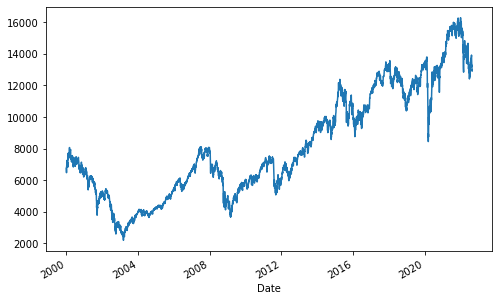

In [19]:
dax["Close"].plot(figsize=(8,5))

Install required packages for Excel support in Pandas, if not already installed. Typically you find out that a package is missing from an error message or by simply studying the documentation. 

Note that as a package manager, **`pip` is able to install required dependencies of a package automatically**. Sometimes however, specific functionally has optional requirements. After all however, the burden of installing packages is easier than it seems here.

In [ ]:
%%bash
pip install xlrd

<font size="3"><b>Pandas also supports other file formats like <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html">Excel sheets</a> or for bigger datasets the <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html">parquet</a> or <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_feather.html">feather</a> file format:</b></font>

In [22]:
# example loading an excel sheet with Pandas in Python
excel = pd.read_excel('data/example.xls')
excel

Type                        Name             Business    ISIN  \
0   Fonds  F.TEM.INV-F.TECHN.A A.EUR                    IT  A0KEDE   
1     ETF  ISHSIII-CORE MSCI WLD DLA         World Economy  A0RPWH   
2     ETF        ISHSV-MSCI ACWI DL A  World, more diverse  A1JMDF   
3     ETF  IS C.MSCI EMIMI U.ETF DLA    Emerging Countries  A111X9   
4     ETF     L+G-L+G CYBER SEC.U.ETF             Cybersec  A14WU5   
5     ETF   ISHS IV-AUTO.+ROBOTIC.ETF   Automation/Robotik  A2ANH0   
6     ETF    INVESCOM2 E GL BLOCKCH A     Krypto/Blockhain  A2PA3S   
7     ETF  VANECK HYDROGEN EC UC.ETF           Wasserstoff  A2QMWR   
8     ETF           LYX.IF-ROB.AI DLA           Robotik/AI  LXY0ZN   
9     ETF    L&G ETF-HYDROGEN ECONOMY          Wasserstoff  A2QMAL   
10    ETF   ISHSIV-MSCI WLD ESG S.DLA    World Economy ESG  A2N6TD   
11    ETF   ISHSV-S+500INF.T.SECT.DLA                  NaN  A142N1   
12    ETF   VANECK VID ESPORTS UC.ETF     E-Sports, Gaming  A2PLDF   

    Price / EUR  
0        39.160  
1        72.512  
2        61.970  
3        31.372  
4        21.685  
5        11.508  
6       100.820  
7        15.222  
8        34.615  
9         7.030  
10          NaN  
11          NaN  
12       34.855

<div class="alert alert-block alert-success"><b>Exercise:</b> 
    <ol type="1">
        <li>Load the file data/example.feather using <i>pd.read_feather</i>. Find out what it contains, print the column names and the size of the DataFrame. </li>
        <li>Then write a function which loads a file (<b>in this case <i>data/example.feather</i></b>)...</li> 
        <li>...redefines the column "time" as index and extract only the column "close",...</li> 
        <li>...removes duplicated timestamps, resamples the data to 1min intervals and calculates the moving average over windows of 24 hours.</li>
        <li>Determine the returns of the resampled column "close" which are defined as $\mathrm{(close(t_{n+1}) / close(t_{n})) - 1}$.</li> 
        <li>Finally, plot the moving average, the resampled time-series and a histogram of the returns.</li>
    </ol>
<b>Hint:</b> Have a look at the methods <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html">duplicated()</a>, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html">resample()</a>, bfill() <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">plot()</a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html">rolling()</a> and mean(). The method <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html">shift()</a> could be useful for the calculation of returns. Use the pandas plotting function with the <i>kind="hist"</i> argument to plot a histogram. Import "from matplotlib import pyplot as plt" and plt.figure() to init a new plot.
    
</div>

<font size="3"><b>First, install the required packages to support feather and parquet files in Pandas:</b></font>

In [ ]:
%%bash
pip install pyarrow

In [ ]:
feather = pd.read_feather('data/example.feather')
print(feather.info)
print(feather.columns)
print(feather.shape)
print(feather.size)

<b>Then try the exercise yourself here:</b></font>

In [ ]:
#you can use the following predefined arguments for simpler plotting
plot_args = {'figsize' : (16,10), 'grid' : True, 'fontsize' : 18, 'legend' : True}

#use them like this:
feather.close.plot(label="close", **plot_args)

#YOUR CODE HERE

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### Example Solution:

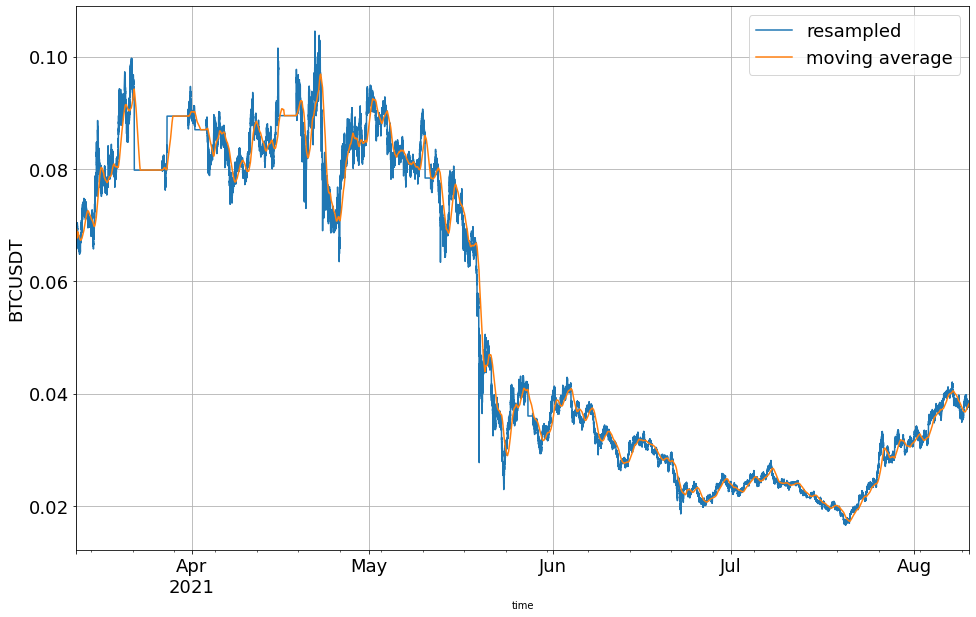

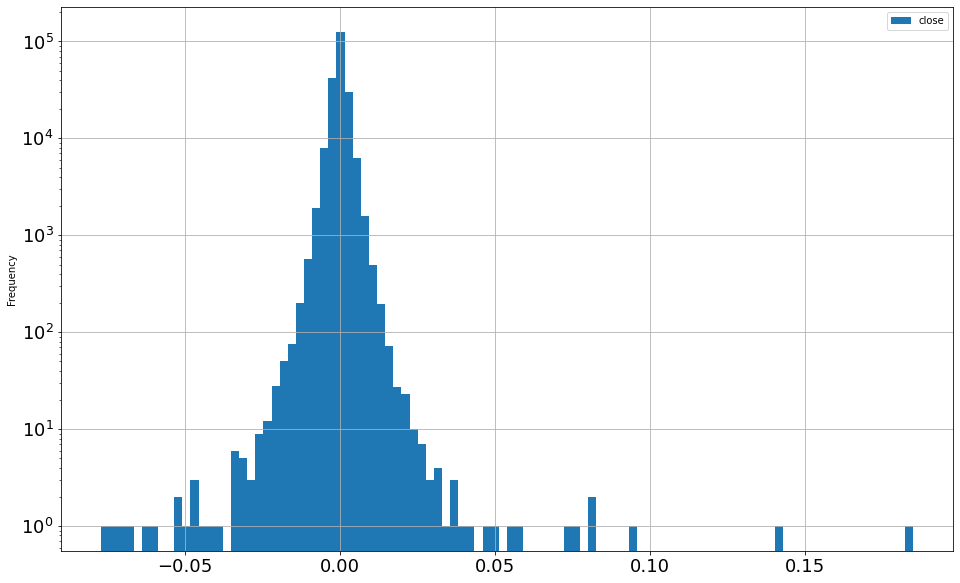

In [92]:
file = "data/example.feather"
feather = pd.read_feather(file) 

feather.index = feather.time #timestamp as index
feather = feather.close
#remove duplicated timestamps
feather = feather[~feather.index.duplicated()] 
#resamples the data to 1 min bins, keep the first value in a bin or for empty bins 
#insert the value of the next non empty bin ("backfill")
feather_resampled = feather.resample("1min").bfill() 
#compute the moving average over windows of size 5
moving_average = feather_resampled.rolling("24h").mean()
#compute the returns
returns = (feather_resampled.shift(1) / feather_resampled)-1

#plots
plot_args = {'figsize' : (16,10), 'grid' : True, 'fontsize' : 18, 'legend' : True}
from matplotlib import pyplot as plt

plt.figure() #init a new plot
feather_resampled.plot(label="resampled", **plot_args)
moving_average.plot(label="moving average", **plot_args)
plt.ylabel("BTCUSDT",fontsize=18)
plt.legend(fontsize=18)

plt.figure() #init a new plot
returns.plot(kind="hist", bins=100, **plot_args)
plt.yscale("log")

<br><br><br>
### Decorators
<br>
<font size="3">
    <b><a href="https://wiki.python.org/moin/PythonDecorators">Decorators</a> help to wrap functions around functions or class methods with a shorter notation, the so-called <i>syntactic sugar</i>, using the @-symbol.</b> Decorators are often used in 3rd party packages for debugging and runtime analysis. <br><br>
A popular package to measure the runtime of a function call or an algorithm is <i>timeit</i>. But it is also frequently used in frameworks like Django or Flask for Full-Stack Python where Python-based web applications are developed to denote event callback functions.
</font>
<br><br>

### Examples:

In [1]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

@my_decorator
# @my_decorator is just an easier way of saying say_whee = my_decorator(say_whee)
def say_whee():
    print("Whee!")
    
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [2]:
import time
import numpy as np

def benchmark(func):
    def wrapper():
        t1 = time.time()
        func()
        delta_t = time.time() - t1
        print(str(np.round(delta_t,6))+" seconds passed.")
    return wrapper

@benchmark
def something_intensive():
    print("zZzZzZ")
    time.sleep(2)
    
something_intensive()

zZzZzZ
2.002208 seconds passed.


<font size="3">
<b>In Python it's also possible to define decorators with arguments and even use multiple decorators with the same function or class method.</b>
</font>

### Example:

In [3]:
import time

def print_delayed(delay = 1):
    def decorator(function):
        def wrapper(*args, **kwargs):
            out = function(*args, **kwargs)
            for n in range(len(out)+1):
                print(out[:n]+"\r")
                time.sleep(delay)
        return wrapper
    return decorator

@print_delayed(delay = 0.2)
def greeting(name):
    return "Hello, "+name+" !"

In [4]:
greeting("John Doe")


H
He
Hel
Hell
Hello
Hello,
Hello, 
Hello, J
Hello, Jo
Hello, Joh
Hello, John
Hello, John 
Hello, John D
Hello, John Do
Hello, John Doe
Hello, John Doe 
Hello, John Doe !


### Built-in Decorators
<br>

<font size="3">
    You may checkout the popular built-in decorators in Python, e.g. the <b><a href="https://www.geeksforgeeks.org/python-property-decorator-property/#:~:text=%40property%20decorator%20is%20a%20built,setter%20and%20deleter%20as%20parameters">@property</a></b></i> decorator. <br>
    <b>It makes a class method accessible as if it would be an attribute of the class object.</b>
</font>

<div class="alert alert-block alert-success"><b>Exercise:</b> 
    Write a decorator for the function in the following cell that asserts that the passed argument is a number greater than zero. Print a positive message in case $x$ is positive and a warning otherwise.
</div>

In [ ]:
import numpy as np

def f(x):
    return np.log(x)

f(3)
f(0)
f(-1)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### Example Solution:

In [40]:
import numpy as np

def assert_x(func):
    def wrapper(x):
        if x > 0:
            print("You passed a positive number, great!")
            y = func(x)
            print(f"f({x})=", y)
            return y
        else:
            print(f"Ouch! This function requires x > 0. You called f({x}).")
    return wrapper

@assert_x
def f(x):
    return np.log(x)

f(3)
f(0)
f(-1)

You passed a positive number, great!
f(3)= 1.0986122886681098
Ouch! This function requires x > 0. You called f(0).
Ouch! This function requires x > 0. You called f(-1).


<br><br><br>
### Performance Aspects of Python

<br>
<font size="3">In some cases, like the analysis of big amounts of data or for simulation codes, performance matters. If the acceleration that numpy or pandas offer is still insufficient or specific code needs to be accelerated, Python offers various ways to speed up your code with statically compiled code using <a href="https://cython.org/">Cython</a> and just-in-time (JIT) compilation using <a href="http://numba.pydata.org/">Numba</a>. This <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html">link</a> presents examples to use Cython and Numba with Pandas.<br><br> Another interesting Python module is <a href="https://dask.org/">Dask</a> which offers distributed and/or parallelized processing of large data sets. Dask offers e.g. a <a href="https://docs.dask.org/en/latest/dataframe.html">Dask DataFrame</a> which can be distributed over multiple nodes in a cluster and supports distributed, parallelized data processing using Pandas DataFrame-like objects.<br><br>
In the following, a small introduction on how to use Numba, a just-in-time compiler, is given and you'll see a speed comparison of Numba and the normal Python function.<br><br>

The easiest way to use Numba for a Python function, is to use the specific decorator (decorators were previously introduced in this course):</font>

<font size="3"><b>If Numba is not installed, install the numba module here:</b></font>

In [ ]:
%%bash
pip install numba

In [42]:
# import of the decorator from the numba module
from numba import jit

# decorator to indicate that just-in-time compilation is desired
@jit # or @jit(nopython=True), if code is parallelizable use parallel = True
def function(x):
    # your loop or numerically intensive computations
    return x

<font size="3">Whenever a Python function is decorated this way, the Python function will be translated to LLVM code, specific byte code that is executed on a virtual machine, comparable to Java and also with a speed comparable to Java or C(++). The illustration below describes the compilation process:<br><br>
<center>
    <img src="img/llvm.png" width="60%">
</center>
<br>
    <font size="2"><i>Source: <a href="https://github.com/ContinuumIO/gtc2017-numba/blob/master/1%20-%20Numba%20Basics.ipynb">https://github.com/ContinuumIO/gtc2017-numba/blob/master/1%20-%20Numba%20Basics.ipynb</a></i></font><br><br>
First, Python function is taken, optimized and is converted into Numba’s intermediate representation, then after type inference which is like Numpy’s type inference (so python float is a float64), it is converted into LLVM interpretable code. This code is then fed to LLVM’s just-in-time compiler to give out machine code.<br><br>
</font>

### Example:

In [43]:
from numba import jit, float32
import timeit
import math

# you can explicitly define a function signature
# so that data types are not inferred
@jit(float32(float32,float32))
def hypot(x, y):
    # Implementation from https://en.wikipedia.org/wiki/Hypot
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

# benchmarks the JIT version
%timeit hypot(3.0, 4.0)
# benchmarks the Python function
%timeit hypot.py_func(3.0, 4.0)
# benchmarks the implementation in the math module
%timeit math.hypot(3.0, 4.0)

106 ns ± 0.259 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
274 ns ± 0.547 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
52.9 ns ± 0.159 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


<font size="3">For further information, look <a href="https://towardsdatascience.com/speed-up-your-algorithms-part-2-numba-293e554c5cc1">here</a></font>


<br><br><br>
## The object-oriented programming (OOP) paradigm

<br>
<font size="3">
    <b>Python is a multi-paradigm programming language</b>, hence supporting multiple <a href="https://en.wikipedia.org/wiki/Comparison_of_programming_paradigms">programming paradigms</a>. A programming paradigm is a style, philosophy or a set of principles followed in structuring your code and the way to implement its intended functionality. Among the various paradigms, the <a href="https://en.wikipedia.org/wiki/Functional_programming"><b>functional</b></a> and the <a href="https://en.wikipedia.org/wiki/Object-oriented_programming"><b>object-oriented programming (OOP)</b></a> paradigm are the most popular, also in Python.<br>

<b>The functional paradigm</b> focusses on:
<ul>
<li><b>Structuring your code</b>
</li>
<li>
<b>Functions</b> in a mathematical sense <b>with arguments and return values</b>.
</li>
<li>
<b>Scoping allowing for <b>local variables</b> and <b>isolation</b>.
</li>
<li>
<b>Functions allowing the reusability</b> of parts of the code since they <b>should ideally work as black boxes</b>.
</li>
<li>
    <b>Statelessness</b>, hence <b>it shouldn't matter when a function is called.</b> As long as the same input is used, the function should yield the same output. <b>Hence functions are only loosely coupled to data</b> outside of their scope.
</li>
</ul>
<br>
A <b>use case</b> would be for <b>smaller projects or specialized scripts</b> where <b>new features are rather unlikely to be implemented.</b><br>
Examples for other programming languages following this paradigm are C, Fortran and Cobol.
<br>
<br>
<b>The OOP paradigm</b> focusses on:
<ul>
<li><b>Classes defining objects encapsulating functionality</b> which could also exist independently and can be easily ported to other projects.
</li>
<li>
<b>Class objects posess <i>methods</i></b>, functions bound to the object which should act only on the <b><i>attributes</i></b> of the object. The latter are <b>variables bound to the object instance.</b>
</li>
<li>
<b>The data (its state) is strictly bound to the object.</b>
</li>
<li><b>States</b> since the objects (can) store a state in their attributes. The interaction of these objects with the environment takes place via <b><i>special object methods</i></b>, the so-called <b><i>interfaces</i></b>, to avoid direct manipulation of object attributes from outside <b>ensuring data security.</b> <b>Statefulness implies</b> that the <b>execution order of object methods can matter.</b>
</li>
<li>
<b>Classes grouped in modules</b> so that the objects have the specific environments to work in. This allows <b>easy extensibility</b>.
</li>
<li>
<b>Inheritance</b> allowing for a sub-class to inherit methods and attributes from the parent class.
</li>
<li>
<b>The program functionality is realized by object interactions</b>, hence message passing between the objects. 
</li>
</ul>
<br>
A <b>use case</b> is a <v>big project</b> with <b>many collaborators</b> where the <b>task can be easily subdivided</b>, where <b>statefulness</b> is important and <b>new features are likely to be added.</b>
<br>
Examples for other programming languages following this paradigm are Java, C++, Objective-C, Ruby or VB .NET.<br>
<br>

<font size="3">
<b>In summary, the abstract features of object-oriented programming are</b><br>
<ul>
    <li><b>Inheritance:</b> <br>Derivation of class from another class. Hierarchy of classes sharing common attributes and methods. Allows faster development of new features using already existing interfaces.</li><br>
    <li><b>Polymorphism:</b> <br>A function, variable or object can have multiple forms, e.g. the same method could except different number and type of input arguments or the usage of a common interface for objects of different classes.</li><br>
    <li><b>Abstraction:</b><br> A simplified data representation
    </li>
    <br>
    <li><b>Encapsulation:</b><br> Bundling data and methods to hide the internal state and mechanics of an object from the outside. Ensures data safety, portability and maintainability.</li>
</ul>
</font>

### Classes, Objects & Attributes
<br>
<div align="center">
    <img src="img/yoda_meme.png" width="40%">
</div>
<br>
<font size="2">
    <i>Source:</i> <a href="https://medium.com/@972LPV/mutable-vs-immutable-objects-in-python-a8a3439636b6"><i>https://medium.com/@972LPV/mutable-vs-immutable-objects-in-python-a8a3439636b6</i></a>
</font>
<br>
<br>
<font size="3">
    <b>Classes are blueprints or templates for objects in Python defining the object <i>properties via attributes</i> and <i>behavior via methods</i>.</b><br>
In Python, even the basic builtin datatypes like int, float or str, are objects of a class in the end. Even references to functions. In Python, every entity is and can be treated as object.<br><br>

<font size="4">
<b>A class definition for an object in Python has the following syntax:</b><br><br>
</font>
<font size="3">
<b>class <i>ClassName</i>(<i>ParentClass</i>):</b><br>
<p style="margin-left: 20px"><b>def __init__(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">self.<i>public_attr</i> = <i>value</i></font></p>
<p style="margin-left: 40px"><font face="Courier">self.<i>_protected_attr</i> = <i>value</i></font></p>
<p style="margin-left: 40px"><font face="Courier">self.<i>__private_attr</i> = <i>value</i></font></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font></p>
<p style="margin-left: 40px"><b>[return <b><i>value</i>]</b></p>

<p style="margin-left: 20px"><b>def public_method(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font></p>
<p style="margin-left: 40px"><b>[return <b><i>value</i>]</b></p>

<p style="margin-left: 20px"><b>def _protected_method(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font></p>
<p style="margin-left: 40px"><b>[return <b><i>value</i>]</b></p>

<p style="margin-left: 20px"><b>def __private_method(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font><br>
<b>[return <b><i>value</i>]</b></p>
<br><br>
    
<b>where the private, builtin method <i>__init__</i> is the so-called <i>constructor</i> of the class object which is invoked when a new class object is <i>instantiated</i> (created).</b><br>
<b>A function or method does not need to return a value. If no return statement is present, a NoneType object will be returned. However, the function or method needs to contain at least one statement (or a <i>pass</i>).</b><br>  
<b>The class naming convention is to start with a capital letter and may use only here camel case, hence the alternating use of small and capital letters to create seperation, e.g. ClassName.</b><br><br>
<font size="4">
<u><b>Attribute and Method Naming Convention:</b></u>
</font>
<font size="3">
<br>
<br>
<b>Methods or attributes</b>
<ul>
    <li><b>without leading underscore</b> as name prefix are <b>public.</b></li>
    <li><b>with one leading underscore</b> as name prefix are <b>protected.</b></li>
    <li><b>with two leading underscores</b> as name prefix are <b>private.</b></li>
    <li><b>with two underscores as</b> name <b>prefix and suffix</b> are <b>private, built-in methods.</b></li>
</ul>
<b>In contrast to other programming languages, this is <u>just a notational convention</u> and by no means a real access protection!</b><br>
<b>Protected and private methods and protected attributes can be accessed anyway!</b><br> Private attribute access is possible using the built-in dictionary representation of an object: <i>obj.__dict__[attribute_name]</i>.<br><br>
<b>When you attempt to access a private attribute, an error is thrown, but it can be accessed anyway with a trick.</b>
</font><br><br>
    

### Example:

In [11]:
#required import to use type hinting with custom class objects are return value data type
from __future__ import annotations

# class definition
# the class "Dog" inherits from class "object"
# every class inherits from that class as default
# naming convention for class names is to start with a capital letter
class Dog(object):
    
    # the constructor of the class is a private, built-in method
    # 
    def __init__(self, name : str, age : int) -> Dog:
        # a private attrbute which should not be changed from outside the object
        self.__name = name
        # a protected attrbute which should not be changed from outside the object
        self._age = age
        # a public attrbute which can be accessed/changed from outside the object
        self.favorite_food = "Pizza"
        self.favorite_toy = "Bone"
        self.has = None
        self.__energy = 5
        
    # overload the builtin method __str__ 
    # for an implicit string representation of the object
    #def __str__(self) -> str:
    #    return "This is the dog "+self.__name+". I am "+str(self._age)+" years old."
        
    # a public class method definition with type hints
    def bark(self, volume : int, pitch : int, duration : int) -> str:
        # assemble string
        bark_str_prefix = ["bo","ba","bi"]
        bark_str_letter = ["o","a","i"]
        bark_str_suffix = "rk"
        bark_str = bark_str_prefix[pitch]
        bark_str += bark_str_letter[pitch]*duration
        bark_str += bark_str_suffix
        if volume > 50:
            bark_str = str.upper(bark_str)
            
        if self.__energy <= 0:
            return self.__sleep()
        else:
            self.__energy -= 1
            return bark_str
    
    # a public class method
    # implements an interaction between the objects of class Dog and Ball
    def bite(self, obj):
        if isinstance(obj, Ball):
            obj.deflate()
    
    # a public class method
    def retrieve(self, obj):
        self.has = obj
        return obj
    
    # a private class method - method name starts with two underscores
    def __sleep(self):
        self.__energy = 5
        return "zZzZ"
    
    # setter - method to set private attribute content
    def set_name(self, new_name):
        self.__name = new_name
    
    # getter - method which yields private attribute content
    def get_name(self):
        return self.__name
    
    # getter - method which yields private attribute content
    def get_energy(self):
        return self.__energy

# another class definition
class Ball(object):
    # constructor definition with type hints
    def __init__(self, size : float, color : str, weight : float, inflated : bool) -> Ball:
        self.__color = color
        self.__size = size
        self.__weight = weight
        self.__inflated = inflated
        
    # setter - method to set private attribute content
    def deflate(self) -> None:
        self.__inflated = False

    # setter - method to set private attribute content
    def inflate(self) -> None:
        self.__inflated = True
        
    # setter - method to set private attribute content
    def set_inflated(self, value : bool) -> None:
        self.__inflated = value

    # getter - method which yields private attribute content
    def is_inflated(self) -> bool:
        return self.__inflated
    
    def print_status(self):
        out_str = "The ball is "+self.__color+" and "+str(self.__size)+\
                    " m big and weights "+str(self.__weight)+" kg and is "
        if self.__inflated:
            out_str += "inflated."
        else:
            out_str += "not inflated."
        print(out_str)
        return out_str

# instantiate new "Dog" objects
dog1 = Dog("Bello", 0)
dog2 = Dog("Doggo", 2)
# instantiate new "Ball" object
ball1 = Ball(0.3, "red", 0.2, True)

# print types
print("Object types:")
print("type(dog1)="+str(type(dog1)))
print("type(dog2)="+str(type(dog2)))
print("type(ball1)="+str(type(ball1))+"\n")

# attempt to print Dog-objects
# results in standard string representation for generic objects
# since we have not overloaded the built-in method __str__
# which takes care of the conversion of the object to a string representation
print("Objects implicitly converted to strings:")
print(dog1)
print(dog2)
print(ball1)
print("")

Object types:
type(dog1)=<class '__main__.Dog'>
type(dog2)=<class '__main__.Dog'>
type(ball1)=<class '__main__.Ball'>

Objects implicitly converted to strings:



<font size="3">
When you attempt to print objects of user-defined classes, Python tries to implicitly convert these objects to a string representation.<br><br>
<b>Since <i>Dog</i> and <i>Ball</i> are user-defined classes, Python cannot know what an adequate string representation of that object would be. Therefore, an object is converted to a string of that form as default.</b><br><br>
We can invoke public object methods without any problem. An object method can change attributes of the object, hence an object can have a certain state.
</font>

In [12]:
# invoke public object methods
print("Results of invoked object methods:")
print("----------------------------\n")
print("dog1.bark(40, 0, 1) = "+str(dog1.bark(40, 0, 1)))
print("dog1.bark(50, 1, 1) = "+str(dog1.bark(50, 1, 1)))
print("dog1.bark(60, 1, 1) = "+str(dog1.bark(60, 1, 1)))
print("dog1.bark(60, 1, 10) = "+str(dog1.bark(60, 1, 10)))
print("dog1.retrieve(ball1) = "+str(dog1.retrieve(ball1)))
ball1.print_status()
print("")

# invoke method which modifies the objects attributes
print("ball1.is_inflated() = "+str(ball1.is_inflated()))
print("After invoking ball1.deflate():")
ball1.deflate()
print("ball1.is_inflated() = "+str(ball1.is_inflated()))
print("")

Results of invoked object methods:
----------------------------

dog1.bark(40, 0, 1) = boork
dog1.bark(50, 1, 1) = baark
dog1.bark(60, 1, 1) = BAARK
dog1.bark(60, 1, 10) = BAAAAAAAAAAARK
dog1.retrieve(ball1) = <__main__.Ball object at 0x7fe8effac880>
The ball is red and 0.3 m big and weights 0.2 kg and is inflated.

ball1.is_inflated() = True
After invoking ball1.deflate():
ball1.is_inflated() = False



<font size="3">
The statefullness of objects in Python is also demonstrated by interaction between different object types.<br>
<b>In this example, an object of class Dog invokes a method of another object of a different class, here Ball.</b>
</font>

In [13]:
print("Statefullness of objects:")
print("-------------------------")
print("If method bark() was invoked 5 times (not necessarily sequentially),")
print("the private method __sleep() of the Dog object is invoked.")
print("dog1.get_energy() = "+str(dog1.get_energy()))
print("dog1.bark(100,1,20) = "+str(dog1.bark(100,1,20)))
print("dog1.get_energy() = "+str(dog1.get_energy()))
print("dog1.bark(100,1,20) = "+str(dog1.bark(100,1,20)))
print("dog1.get_energy() = "+str(dog1.get_energy()))
print("")

# interaction between an object of class Dog and of class Ball
print("Interaction between objects:")
print("----------------------------\n")
print("After invoking ball1.inflate():")
ball1.inflate()
print("ball1.is_inflated() = "+str(ball1.is_inflated()))
print("After invoking dog1.bite(ball1):")
dog1.bite(ball1)
print("ball1.is_inflated() = "+str(ball1.is_inflated()))

print("")

# access public object attribute directly
print("dog1.has = "+str(dog1.has))
print("\n")

# attempt to access private object attribute (discouraged anyway, use setter/getter methods instead !)
print("Attempt to access private attribute throws an error (encapsulation):")
print("dog1.__name = "+str(dog1.__name))
# yields an AttributeError

Statefullness of objects:
-------------------------
If method bark() was invoked 5 times (not necessarily sequentially),
the private method __sleep() of the Dog object is invoked.
dog1.get_energy() = 1
dog1.bark(100,1,20) = BAAAAAAAAAAAAAAAAAAAAARK
dog1.get_energy() = 0
dog1.bark(100,1,20) = zZzZ
dog1.get_energy() = 5

Interaction between objects:
----------------------------

After invoking ball1.inflate():
ball1.is_inflated() = True
After invoking dog1.bite(ball1):
ball1.is_inflated() = False

dog1.has = <__main__.Ball object at 0x7fe8effac880>


Attempt to access private attribute throws an error (encapsulation):


AttributeError: 'Dog' object has no attribute '__name'

In [19]:
# attempt to invoke private object method
print("Attempt to invoke private method throws an error (encapsulation):")
print("dog1.__sleep()="+dog1.__sleep())

Attempt to invoke private method throws an error (encapsulation):


AttributeError: 'Dog' object has no attribute '__sleep'

<font size="3"><div class="alert alert-block alert-success"><b>Exercise:</b>
    Define a class <i>Sheep</i> with <b>private</b> attributes <i>color, name, age, sheared</i> and the <b>public</b> attribute <i>id</i>. Implement <b>setters</b> and <b>getters</b> for the private attributes. Implement a <b>public</b> method <i>shear</i> switching the private attribute <i>sheared</i>. Implement a method <i>_ _str _ _</i> for the implicit string representation of the object, so that Python knows what to do when you attempt to print a Sheep object. Then try to print the Sheep object. </div><br>
<b>Try it yourself:</b></font>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### Example Solution:

In [6]:
from __future__ import annotations
from typing import List
import numpy as np
import copy

class Sheep(object):
    def __init__(self, color : str, name : str, age : int, sheared : bool) -> Sheep:
        self.__color = color
        self.__name = name
        self.__age = age
        self.__sheared = sheared
        self.children = []
        
    def set_color(self, color : str):
        self.__color = color
    def get_color(self) -> str:
        return self.__color
    def set_name(self, name : str):
        self.__name = name
    def get_name(self) -> str:
        return self.__name
    def set_age(self, age : int):
        self.__age = age
    def get_age(self) -> int:
        return self.__age
    def get_children(self) -> List[Sheep]:
        return self.children
    def is_sheared(self) -> bool:
        return self.__sheared
    def shear(self) -> None:
        #if self.sheared:
        #    self.__sheared = False
        #else:
        #    self.__sheared = True
        self.__sheared = not self.__sheared
        
    def give_birth(self, n) -> List[Sheep]:
        colors=["black","white","red","blue"]
        for i in range(n):
            rand_color = np.random.randint(0,len(colors))
            self.children.append(Sheep(colors[rand_color],str(np.random.randint(0,1000)),0,False))
        return copy.deepcopy(self.children)
        
    def __str__(self) -> str:
        return "This is a sheep of "+self.__color+" color and it is "+str(self.__age)+" years old."

sheep1 = Sheep("black","Dolly",3,False)
print(sheep1)
childrens = sheep1.give_birth(3)
print(sheep1.get_children())
print(sheep1.is_sheared())
sheep1.shear()
print(sheep1.is_sheared())
sheep1.shear()
print(sheep1.is_sheared())

# although the list of children was returned by sheep1.give_birth(3)
# the elements in childrens, the new sheeps objects, are not real deep copies, but references
# to the old objects in sheep1.__children

# not a real copy
# arr1 = np.array([1,2,3,4])
# arr2 = arr1

# this becomes obvious if the object hashes are compared
# a hash is a (in the best case) unique string or number assigned
# to an input as a result of a (cryptographic) function
print(childrens[0].__hash__)
print(sheep1.children[0].__hash__)

This is a sheep of black color and it is 3 years old.
[<__main__.Sheep object at 0x7fdaed97c430>, <__main__.Sheep object at 0x7fd9c52abe50>, <__main__.Sheep object at 0x7fd9c52abf40>]
False
True
False
<method-wrapper '__hash__' of Sheep object at 0x7fd9c52b7070>
<method-wrapper '__hash__' of Sheep object at 0x7fdaed97c430>


<br><br><br><br>
Due to the way Python works, you can actually start using polymorphism right now even without having learned anything about inheritance yet. Consider the expression `X.make()`. `X` could be an object of any class that has a method called `make`. The same code will work for entirely unrelated objects. You will see how this is useful in the following exercise.

<div class="alert alert-block alert-success"><b>Exercise:</b>
    Check out the following code block. It teaches you how to redirect a <b>print</b> statement to a file instead of the standard output. All it does is replacing the stdout stream with a file stream. It works, because when calling <b>print</b> all what Python does is searching for a method called <b>write(string)</b> in the object referenced by <b>sys.stdout</b>.
    <br><br>
    In your daily work it may be useful to have both: Output to stdout and to a file. Write a custom class with a method called <b>write</b> that accepts a string. Write this string to stdout <i>and</i> to a file. Replace - like in the example - <b>sys.stdout</b> with your custom class and see what happens!
    <br><br>
    Hints:
    <ul>
        <li>Both <b>sys.stdout</b> and a file object created by <b>open</b> have a <b>write</b> method that you can use.</li>
        <li>Since you will override <b>sys.stdout</b> with your own object, you can not use <b>sys.stdout</b> or <b>print</b> in your call directly!</li>
    </ul>
</div>

In [1]:
import sys

stdout_tmp = sys.stdout #remember the stdout stream to revert this change later!
sys.stdout = open("log.file", "a")

#writes to the log file instead of stdout
print("Hello!")

#dont forget to close the file!
sys.stdout.close()
#dont forget to replace the closed filestream again with the original stdout!
sys.stdout = stdout_tmp

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### Example solution:

In [3]:
#YOUR CODE HERE
class MyWriter():
    def __init__(self):
        self.stdout = sys.stdout
    
    def write(self, string):
        with open("log.file", "a") as log:
            log.write(string)
        self.stdout.write(string)
        
stdout_tmp = sys.stdout #remember the stdout stream to revert this change later!
sys.stdout = MyWriter()
print("Hello!")
sys.stdout = stdout_tmp

Hello!


<br><br><br>
### Inheritance & Method prototyping, overriding and overloading
<br>
<font size="3">
    <b>Inheritance is one of the key features of the OOP paradigm.</b><br><br>
    <b>Inheritance allows a child-class or subclass to inherit attributes and methods from one or more parent- or super classes.</b> The figure illustrates this circumstance:<br><br>
    
</font>
<div align="center">
<img src="img/inheritance2.jpg" width="40%">
</div>
<br>
<font size="2"><i>Source: </i><a href="https://www.startertutorials.com/blog/inheritance-polymorphism-python.html">https://www.startertutorials.com/blog/inheritance-polymorphism-python.html</a></font><font size="3">
<br><br>

Inheritance allows to define a hierarchy of classes sharing the same base attributes and methods (interfaces). It can facilitate the implementation of new features in your code.<br><br> Inheritance is very often required when you work with big Python frameworks. There you write your own class by inheriting from a provided (abstract) class to comply with the interfaces or methods expected by the framework environment.<br><br>
    <b>Multiple inheritance</b> is possible in Python, but only indirect via <a href="https://medium.com/@__hungrywolf/mro-in-python-3-e2bcd2bd6851"><b>Method Resolution Order</b> (MRO)</a>, hence the object method are called in a specific order. An example is given below. <br><br>
<b>In particular, method prototyping, overriding and overloading is applied in that case.<br><br>
Method prototypes are simply empty methods defined in the parent class, hence this class is called <i>abstract</i>. <br><br>This prototype method is then overridden by redefining a method with the <u>same name</u> in the sub class.</b><br><br>
    <b>Method overloading</b> is also called <b><i>polymorphism</i></b> since multiple class methods of the <u>same name</u> can be defined, but accepting different numbers of arguments and types. Depending on which <i>signature</i> (number and data types of expected method arguments) of the method fits, the specific method in that case is selected and executed.<br><br>
<b>In contrast to other programming languages like e.g. Java, a builtin implementation of polymorphism is not available in Python, hence it is not possible to define multiple methods of the same name, but accepting different number of arguments.</b> Polymorphism can only be implemented indirectly by default values for (keyword) arguments or variable number of arguments.
</font>

### Example:

In [14]:
# let's use our class Dog from the example above
# let's define a new class InuShiba which inherits from class Dog
class InuShiba(Dog):
    
    # the constructor of the class Dog is overridden here
    def __init__(self, name : str, num_of_memes_published : int, age : int) -> InuShiba:
        
        # in order to have the same attributes like the parent or super class Dog
        # invoke constructor of super class, then define additional attributes
        
        # instead of using the explicit class name here, better use the super() method!
        super().__init__(name, age)
        #Dog.__init__(self, name, age)
        self.__num_of_memes_published = num_of_memes_published
    
    # a new method only InuShiba objects have
    def publish_meme(self):
        self.__num_of_memes_published += 1
        
    # the method bark is overloaded, since the class Dog already has a method bark, but
    # with a different signature: the bark method of Dog expects 3 parameters, 
    # this bark method does not.
    def bark(self, volume=100, pitch=1, duration=10):
        return "Barking in Japanese."

special_dog = InuShiba("Hideki", 2E100, 99)
# inspecting the attributes of a InuShiba object, it in fact shares the same attributes as a Dog object
# but it has additional attributes
print(special_dog.__dict__)
# inspecting the methods of a InuShiba object, it shares in fact the same methods as a Dog object
# but it has additional methods
print(special_dog.__dir__())

# demonstration of method overloading / polymorphic methods
print(special_dog.bark())
print(special_dog.bark(100, 1, 10))
print("")

print(Dog("a",1) == Dog("b",1))
# need to override __add__ to do that
#print(Dog("a",1) + Dog("b",2))
print(dog1.bark(100,1,10))
# invoking bark of a Dog object, throws an exception when invoked without parameters
dog1.bark()

{'_Dog__name': 'Hideki', '_age': 99, 'favorite_food': 'Pizza', 'favorite_toy': 'Bone', 'has': None, '_Dog__energy': 5, '_InuShiba__num_of_memes_published': 2e+100}
['_Dog__name', '_age', 'favorite_food', 'favorite_toy', 'has', '_Dog__energy', '_InuShiba__num_of_memes_published', '__module__', '__init__', 'publish_meme', 'bark', '__doc__', 'bite', 'retrieve', '_Dog__sleep', 'set_name', 'get_name', 'get_energy', '__dict__', '__weakref__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']
Barking in Japanese.
Barking in Japanese.

False
BAAAAAAAAAAARK


TypeError: bark() missing 3 required positional arguments: 'volume', 'pitch', and 'duration'

<br><br><br>
<font size="3"><div class="alert alert-block alert-success"><b>Exercise:</b>
    Create your own DataFrame class by deriving from pandas DataFrame. Add a method that summarizes the dataframe in a useful way (let's ignore the existence of such a method in the base class). Ignore naming conflicts with existing methods of the DataFrame class for now. Print at least the number of rows and the columns of the DataFrame plus any other kind of information you would like to check. </div><br>
<b>Try it yourself:</b></font>

In [ ]:
# YOUR CODE HERE

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### Example Solution:

In [54]:
import pandas as pd

class MyDF(pd.DataFrame):
    
    __n = 3
    
    def summarize(self):
        print("number of rows:", len(self))
        print("columns:", self.columns)
        print(f"The first {self.__n} elements:")
        for i in range(min(len(self), self.__n)):
            print(self.index[i], " : ", self.iloc[i, 0])

        
my_df = MyDF([123,23,54,15,89], columns=["numbers"], index=["a","b","c","d","e"]) #uses pf.DataFrame's constructor

my_df.summarize()

number of rows: 5
columns: Index(['numbers'], dtype='object')
The first 3 elements:
a  :  123
b  :  23
c  :  54


<br><br><br><br><br>
<div class="alert alert-block alert-success"><b>Exercise:</b>
    In the cells below, you will find a little game implemented. 
    
    2 sheep graze on a field. They are hunted by a wolf. You can run the cell as usual and it will loop indefinetely until you cancel execution with <b>Ctrl + C</b>.
    
    However, both Sheep and Wolf have no mechanics implemented. 
    <br>
    (1) 
    
    <ul>
        <li>The method <b>move</b> of <b>GameObject</b> is called every game cycle. This method is a so called actract method that expects objects deriving from <b>GameObject</b> to implement it. Is has no behavior on its own yet. Implement <b>move</b> in the 2 subclasses. </li> 
        <li>If the object is a Sheep, flip a fair coin. If head, it should read the position of the wolf and move away from it. Otherwise it should panic and move in a random direction.</li>  
        <li>If the object is a wolf, it should move one cell towards the closest sheep.</li> 
    </ul>
    <br>
    (2) 
    
    <ul>
        <li>Add an abstract method <b>interact</b> to <b>GameObject</b> that is called every time when 2 game objects share the same position after moving. </li>
        <li>Implement <b>interact</b> such that the wolf can catch the sheep and they die (stop moving and their symbol is replaced).  </li>
        <li>At the end of the game, print a message whether sheep (at least one alive) or wolf has won. </li>
    </ul>
</div>

In [100]:
class GameObject:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def move(self):
        pass
    
    def stay_in_border(self, width=50, height=15):
        self.x = min(self.x, width-3)
        self.x = max(self.x, 1)
        self.y = min(self.y, height-3)
        self.y = max(self.y, 1)

        
class Sheep(GameObject):
    def __init__(self,x,y):
        super(Sheep, self).__init__(x,y)
        self.symbol = "o"

    #YOUR CODE HERE
        
        
class Wolf(GameObject):
    def __init__(self,x,y):
        super(Wolf, self).__init__(x,y)
        self.symbol = "w"

    #YOUR CODE HERE

In [101]:
import time
from IPython.display import clear_output

def update_and_print_world(objects = [], width=50, heigth=15):
    clear_output(wait=True)
    #update 
    for o in objects:
        o.move()
        o.stay_in_border()
    #print
    print("#"*width)
    for y in range(heigth-2):
        line = "#"
        for x in range(1, width-1):
            any_obj = False
            for o in objects:
                if x == o.x and y == o.y:
                    line += o.symbol
                    any_obj = True
                    break
            if not any_obj:
                line += " "
        line += "#"
        print(line)
    print("#"*width)

sheep1 = Sheep(24, 10)
sheep2 = Sheep(28, 1)
wolf = Wolf(30,10)

#YOUR CODE HERE
    
objects = [wolf, sheep1, sheep2]    
    
max_cycles = 20
num_cylces = 0
    
while num_cylces < max_cycles:
    update_and_print_world(objects)
    print("Press the interrupt button to terminate.")
    num_cylces += 1
    time.sleep(0.5)
    
#YOUR CODE HERE

##################################################
#                                                #
#                           o                    #
#                                                #
#                                                #
#                                                #
#                                                #
#                                                #
#                                                #
#                                                #
#                                                #
#                       o     w                  #
#                                                #
#                                                #
##################################################
Press the interrupt button to termiante.


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### Example Solution:

In [98]:
class GameObject:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.alive = True
        
    def move(self):
        pass
        
    def interact(self, other):
        pass
    
    def stay_in_border(self, width=50, height=15):
        self.x = min(self.x, width-3)
        self.x = max(self.x, 1)
        self.y = min(self.y, height-3)
        self.y = max(self.y, 1)

class Sheep(GameObject):
    def __init__(self,x,y):
        super(Sheep, self).__init__(x,y)
        self.symbol = "o"
        
    def set_wolf(self, wolf):
        self.wolf = wolf
        
    def move(self):
        if np.random.random() < 0.5:
            if self.wolf.x < self.x:
                self.x += 1
            elif self.wolf.x > self.x:
                self.x -= 1
            elif self.wolf.y < self.y:
                self.y += 1
            elif self.wolf.y > self.y:
                self.y -= 1
        else: #PANIC!!
            if np.random.random() < 0.5:
                self.x += 1
            else:
                self.x -= 1
            if np.random.random() < 0.5:
                self.y += 1
            else:
                self.y -= 1
        
class Wolf(GameObject):
    def __init__(self,x,y):
        super(Wolf, self).__init__(x,y)
        self.symbol = "w"
        
    def set_sheep(self, sheep):
        self.sheep = sheep
        
    def interact(self, other):
        if isinstance(other, Sheep):
            other.alive = False
            other.symbol = "x"
        
    def move(self):
        start = 0
        while start < len(self.sheep) and not self.sheep[start].alive:
            start += 1
        if start == len(self.sheep):
            return
        closest_sheep = self.sheep[start]
        closest_dist = abs(closest_sheep.x - self.x) + abs(closest_sheep.y - self.y)
        for i in range(start, len(self.sheep)):
            sheep = self.sheep[i]
            if not sheep.alive:
                continue
            dist = abs(sheep.x - self.x) + abs(sheep.y - self.y)
            if dist < closest_dist:
                closest_dist = dist
                closest_sheep = sheep
        if closest_sheep.x < self.x:
            self.x -= 1
        elif closest_sheep.x > self.x:
            self.x += 1
        elif closest_sheep.y < self.y:
            self.y -= 1
        elif closest_sheep.y > self.y:
            self.y += 1

In [99]:
import time
from IPython.display import clear_output

def update_and_print_world(objects = [], width=50, heigth=15):
    clear_output(wait=True)
    #update 
    for o in objects:
        if not o.alive:
            continue
        o.move()
        o.stay_in_border()
        for o2 in objects:
            if not o == o2 and o2.alive and o.x == o2.x and o.y == o2.y:
                o.interact(o2)
    #print
    print("#"*width)
    for y in range(heigth-2):
        line = "#"
        for x in range(1, width-1):
            any_obj = False
            for o in objects:
                if x == o.x and y == o.y:
                    line += o.symbol
                    any_obj = True
                    break
            if not any_obj:
                line += " "
        line += "#"
        print(line)
    print("#"*width)

sheep1 = Sheep(24, 10)
sheep2 = Sheep(28, 10)
wolf = Wolf(30,10)

sheep1.set_wolf(wolf)
sheep2.set_wolf(wolf)
wolf.set_sheep([sheep1, sheep2])
    
objects = [wolf, sheep1, sheep2]    
    
max_cycles = 30
num_cylces = 0
    
while num_cylces < max_cycles:
    update_and_print_world(objects)
    print("Press the interrupt button to termiante.")
    num_cylces += 1
    time.sleep(0.5)
    
clear_output(wait=True)
if sheep1.alive or sheep2.alive:
    print("Sheep won!")
else:
    print("Wolf won!")

Sheep won!
